# Trabalho Final - MBA Inteligência Artificial e Machine Learning
FIAP 2022~2023


## Lógica usada neste trabalho
Existem alguns problemas principais neste dataset:
    * Muitos nulos
    * Algumas variáveis não são 'inputáveis' por virem de outros setores da empresa
    * Alta correlação entre colunas
Portanto, será necessário realizar uma redução de dimensionalidade e tratamento dos dados, primeiramente em colunas que indicam informações que passaram por outros setores da empresa, de forma a permitir um retorno automatizado.

### Fluxo:
* Análise Exploratória
* Redução da dimensionalidade em colunas que expressem dados de outros processos e com alta correlação
* Tratamento de Dados Faltantes
* Feature engineering 
* Clusterização de empresas
* Análise de características dos clusters
* Aplicação dos clusters no dataframe
* Escrita do melhor modelo de clusterização em pickle
* LabelEncoding do dataframe
* StandardScaling do dataframe
* Remoção de outliers
* Treino e teste de modelos com GridSearch
* Escrita dos melhores modelos em pickle


# Bibliotecas e Pacotes

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
import json
import datetime
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings("ignore")

#Análise Exploratória

In [ ]:
df = pd.read_csv('bootcamp-solicitacoescredito.csv')
pd.set_option('display.max_columns', df.shape[1])
pd.set_option('display.max_rows', 50)

df

numero_solicitacao             razaoSocial          nomeFantasia  \
0                      1  James Richardson-Patel    Alexandra Williams   
1                      2      Dr. Geoffrey Walsh     Mr. Darren Arnold   
2                      3           Joanna Hudson        Dr. David Rees   
3                      4    Gordon Jones-Hopkins      Sara Reid-Robson   
4                      5               Nigel Lee    Dr. Stanley Duncan   
...                  ...                     ...                   ...   
8968                9041           Leah Williams         Georgia Booth   
8969                9042      Mr. Jordan Stevens      Miss Ellie Kelly   
8970                9043         Mr. Barry Wells       Danielle Hudson   
8971                9044             Keith Jones  Steven Kennedy-Jones   
8972                9045          Cheryl Johnson  Chelsea Kay-Sinclair   

            cnpjSemTraco  maiorAtraso  margemBrutaAcumulada  \
0     KEBE17609492220843            0              0.252448   
1     JRBK88908250677300            0              0.000000   
2     GCVQ28531614261293            4              0.624777   
3     KJND32266018316396           20              0.000000   
4     CGQN15826802440348           20              0.454088   
...                  ...          ...                   ...   
8968  YKGZ02907098931653          149              0.306580   
8969  UCBM91111020900951           23              0.329796   
8970  CLDB61185288622179            3              0.383919   
8971  BRJP37453437154592           11              0.424099   
8972  COZD54939108010752            4              0.365041   

      percentualProtestos       primeiraCompra  prazoMedioRecebimentoVendas  \
0                     0.0  2015-12-10T00:00:00                            0   
1                     NaN  2019-06-12T17:28:31                            0   
2                     0.0  2019-11-27T00:00:00                            0   
3                     NaN  2017-02-13T17:20:27                            0   
4                     0.0  2010-07-13T00:00:00                           20   
...                   ...                  ...                          ...   
8968                  0.0  2006-04-26T00:00:00                           59   
8969                  0.0  2016-08-03T00:00:00                            0   
8970                  0.0  2018-10-25T00:00:00                            4   
8971                  0.0  2011-08-10T00:00:00                           31   
8972                  0.0  2009-05-27T00:00:00                           56   

      titulosEmAberto  valorSolicitado                 status  \
0                0.00          50000.0       AprovadoAnalista   
1                0.00          10000.0  DocumentacaoReprovada   
2                0.00          20000.0       AprovadoAnalista   
3                0.00          25000.0       AprovadoAnalista   
4             1486.95          50000.0       AprovadoAnalista   
...               ...              ...                    ...   
8968        599964.04         900000.0  EmAnaliseDocumentacao   
8969             0.00         150000.0  EmAnaliseDocumentacao   
8970          2933.38         150000.0  EmAnaliseDocumentacao   
8971        559679.98        1290000.0  EmAnaliseDocumentacao   
8972         13640.01          50000.0  EmAnaliseDocumentacao   

                 definicaoRisco  diferencaPercentualRisco  percentualRisco  \
0          De 11 a 30 % - Baixo                  0.716981         0.283019   
1     De 0 a 10 % - Muito Baixo                  1.000000         0.000000   
2          De 11 a 30 % - Baixo                  0.716981         0.283019   
3           De 51 a 80 % - Alto                  0.396226         0.603774   
4          De 11 a 30 % - Baixo                  0.830189         0.169811   
...                         ...                       ...              ...   
8968  De 0 a 10 % - Muito Baixo                  1.000000         0.000000   
8969  

##Dicionário de Dados

In [ ]:
with open ('descricao_colunas.json', 'r') as jsonfile:
    dict_desc_colunas = json.load(jsonfile)
for item in sorted(dict_desc_colunas):
    print (item+':', dict_desc_colunas[item])

anoFundacao: Ano de fundação da empresa
ativoCirculante: Ativo circulante informado na documentação da empresa
capitalSocial: Capital social informado na documentação da empresa
cnpjSemTraco: CNPJ Anonimizado
custos: Custos informado na documentação da empresa
dashboardCorrelacao: uma correlação interna de risco, mas que os analistas não conseguiram explicar nas reuniões realizadas
dataAprovadoEmComite: data em que a solicitação de crédito foi aprovada por um comitê
dataAprovadoNivelAnalista: data em que a solicitação de crédito foi aprovada por um analista de crédito
definicaoRisco: categorização de risco
diferencaPercentualRisco: 1- percentual Risco
duplicatasAReceber: Duplicatas a receber informado na documentação da empresa
empresa_MeEppMei: Flag informando se o cliente é um pequeno negócio
endividamento: Endividamento informado na documentação da empresa
estoque: estoque Informado na documentação da empresa
faturamentoBruto: Faturamento bruto informado na documentação da empresa
i

In [ ]:
print ('Porcentagem de valores cedidos em relação a solicitados:',
       round((df['valorAprovado']/df['valorSolicitado']).mean(),2))

Porcentagem de valores cedidos em relação a solicitados: 0.83


# Dimensionalidade e Correlação
Verificando a possibilidade de remover colunas com alta correlação e que não atendem à necessidade de propor valor de crédito de forma automatizada, e assim reduzir o dataset.

## Mapeando Correlações

ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;

ρ = 0,7 a 09 (positivo ou negativo): correlação forte;

ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;

ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;

ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

## Verificação de correlação em variáveis independentes
A função abaixo verifica a correlação entre as variáveis, enquanto remove as variáveis 'valorSolicitado' e 'valorAprovado' da análise por ser dados de entrada com muita influência das demais variáveis

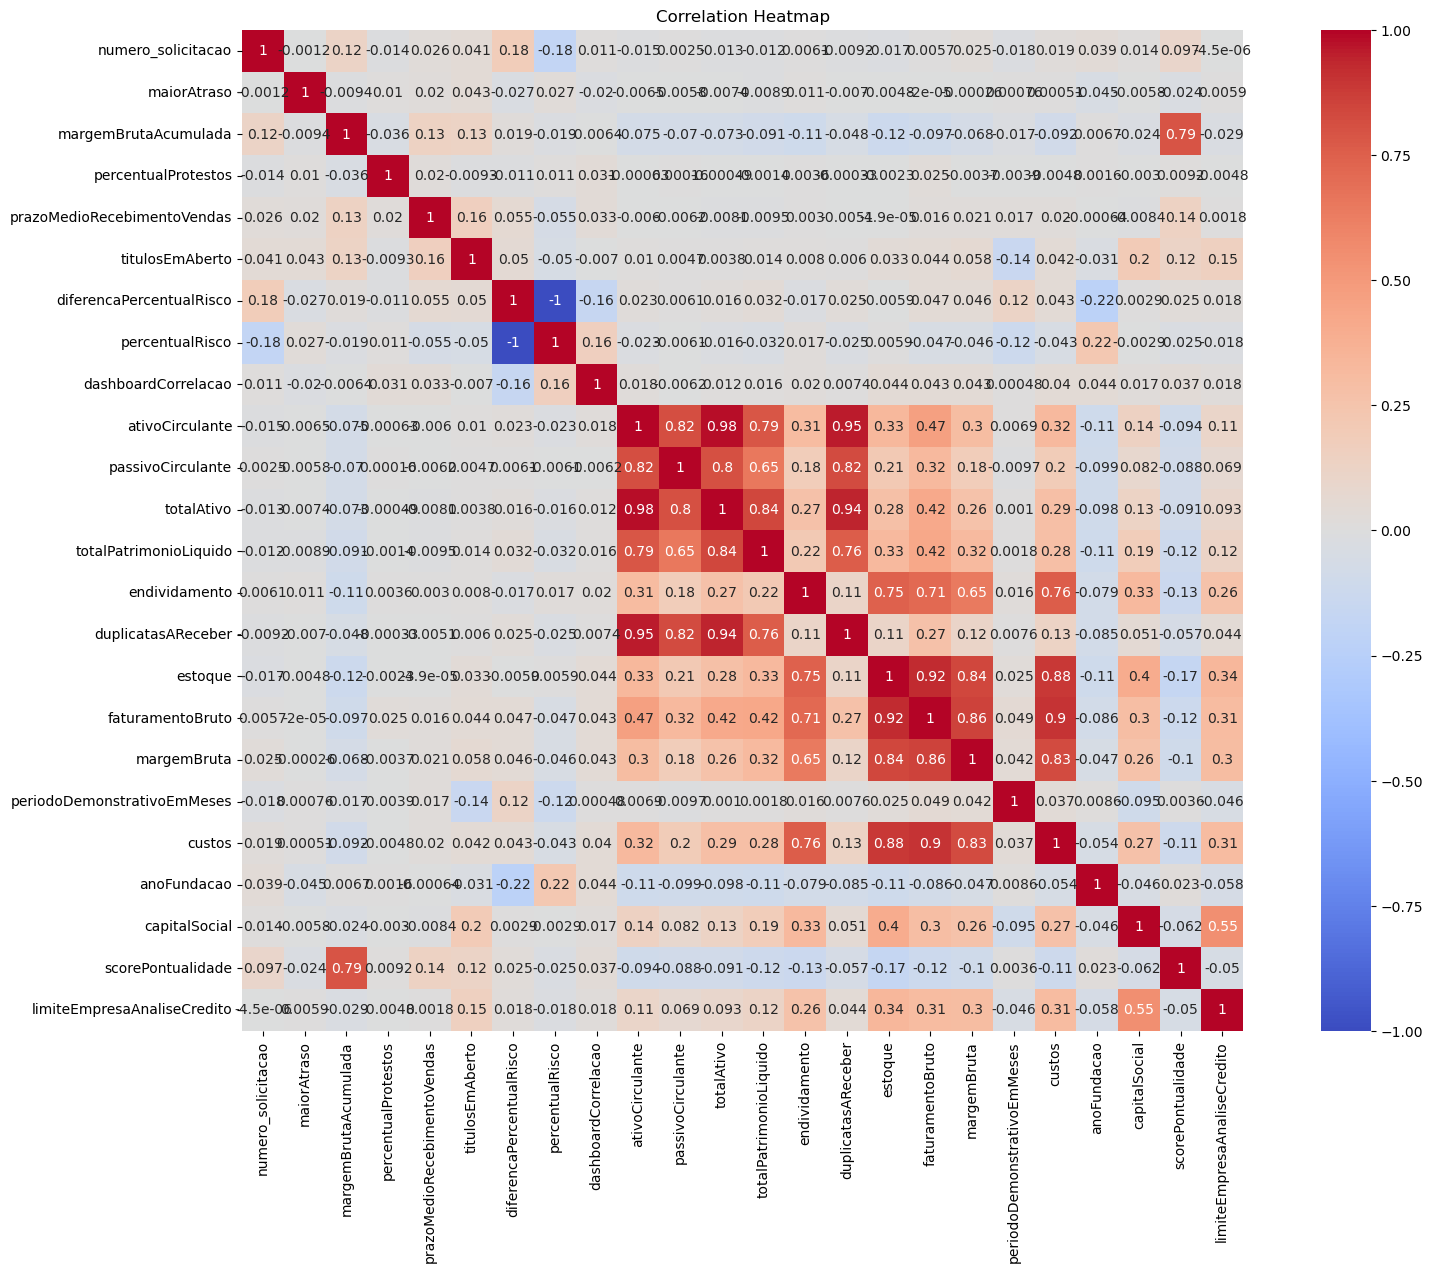

In [ ]:
def verifica_correlacao(df):
    corr_matrix = df.drop(columns=['valorSolicitado','valorAprovado']).corr() 
    plt.figure(figsize=(20, 13))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True)
    plt.title('Correlation Heatmap')
    plt.show()
    return corr_matrix
corr_matrix = verifica_correlacao(df)

__Nota-se acima a alta correlação entre muitas variáveis. Desse modo, a função a seguir busca otimizar a visualização das variáveis e suas maiores correlações__

In [ ]:
colunas_alta_correlacao = {}
for row_idx, row in corr_matrix.iterrows():
    dict_row = {}
    for col in corr_matrix.columns:
        if col != row_idx:
            dict_row.update({row[col]:col})
    score_correlacao_ascendente = []
    for corr_score in sorted(dict_row, reverse=True):
        score_correlacao_ascendente.append(dict_row[corr_score])
    colunas_alta_correlacao.update({row_idx:score_correlacao_ascendente})
df_correlacao_ordenada = pd.DataFrame.from_dict(colunas_alta_correlacao).T
df_correlacao_ordenada = df_correlacao_ordenada[[0,1,2]]
df_correlacao_ordenada.sort_index(inplace=True)
df_correlacao_ordenada.columns = ['maior', 'segunda_maior', 'terceira_maior']
df_correlacao_ordenada

maior  \
anoFundacao                              percentualRisco   
ativoCirculante                               totalAtivo   
capitalSocial                limiteEmpresaAnaliseCredito   
custos                                  faturamentoBruto   
dashboardCorrelacao                      percentualRisco   
diferencaPercentualRisco              numero_solicitacao   
duplicatasAReceber                       ativoCirculante   
endividamento                                     custos   
estoque                                 faturamentoBruto   
faturamentoBruto                                 estoque   
limiteEmpresaAnaliseCredito                capitalSocial   
maiorAtraso                              titulosEmAberto   
margemBruta                             faturamentoBruto   
margemBrutaAcumulada                   scorePontualidade   
numero_solicitacao              diferencaPercentualRisco   
passivoCirculante                     duplicatasAReceber   
percentualProtestos                  dashboardCorrelacao   
percentualRisco                              anoFundacao   
periodoDemonstrativoEmMeses     diferencaPercentualRisco   
prazoMedioRecebimentoVendas              titulosEmAberto   
scorePontualidade                   margemBrutaAcumulada   
titulosEmAberto                            capitalSocial   
totalAtivo                               ativoCirculante   
totalPatrimonioLiquido                        totalAtivo   

                                           segunda_maior  \
anoFundacao                          dashboardCorrelacao   
ativoCirculante                       duplicatasAReceber   
capitalSocial                                    estoque   
custos                                           estoque   
dashboardCorrelacao                              estoque   
diferencaPercentualRisco     periodoDemonstrativoEmMeses   
duplicatasAReceber                            totalAtivo   
endividamento                                    estoque   
estoque                                           custos   
faturamentoBruto                                  custos   
limiteEmpresaAnaliseCredito                      estoque   
maiorAtraso                              percentualRisco   
margemBruta                                      estoque   
margemBrutaAcumulada         prazoMedioRecebimentoVendas   
numero_solicitacao                  margemBrutaAcumulada   
passivoCirculante                        ativoCirculante   
percentualProtestos                     faturamentoBruto   
percentualRisco                      dashboardCorrelacao   
periodoDemonstrativoEmMeses             faturamentoBruto   
prazoMedioRecebimentoVendas            scorePontualidade   
scorePontualidade            prazoMedioRecebimentoVendas   
titulosEmAberto              prazoMedioRecebimentoVendas   
totalAtivo                            duplicatasAReceber   
totalPatrimonioLiquido                   ativoCirculante   

                                          terceira_maior  
anoFundacao                           numero_solicitacao  
ativoCirculante                        passivoCirculante  
capitalSocial                              endividamento  
custos                                       margemBruta  
dashboardCorrelacao                          anoFundacao  
diferencaPercentualRisco     prazoMedioRecebimentoVendas  
duplicatasAReceber                     passivoCirculante  
endividamento                           faturamentoBruto  
estoque                                      margemBruta  
faturamentoBruto                             margemBruta  
limiteEmpresaAnaliseCredito                       custos  
maiorAtraso                  prazoMedioRecebimentoVendas  
margemBruta                                       custos  
margemBrutaAcumulada                     titulosEmAberto  
numero_solicitacao                     scorePontualidade  
passivoCirculante                             totalAtivo  
percentualProtestos          prazoMedioRecebim

__As seguintes variáveis serão removidas:__
* ativoCirculante - melhor representada pelo totalAtivo
* passivoCirculante - alta correlação com ativoCirculante
* estoque - alta correlação com capitalSocial e faturamentoBruto
* custos - alta correlação com capitalSocial e faturamentoBruto
* duplicatasAReceber - alta correlação com totalAtivo
* totalPatrimonioLiquido - alta correlação com totalAtivo 
* endividamento - alta correlação com faturamentoBruto
* margemBruta - alta correlação com faturamentoBruto
* numero_solicitacao - número de linha, não necessário para ML (Este dado será mantido para a etapa seguinte e então removido)
* razaoSocial - CNPJ é PK
* nomeFantasia - CNPJ é PK
* maiorAtraso - dado sem referência para novos clientes
* margemBrutaAcumulada - não faz sentido para ML
* percentualProtestos - baseado em dado externo
* status - baseado em dado externo
* definicaoRisco - baseado em dado externo
* diferencaPercentualRisco - baseado em dado externo
* percentualRisco - baseado em dado externo
* dashboardCorrelacao - baseado em dado externo
* dataAprovadoEmComite - baseado em dado externo
* anoFundacao - já existe coluna categórica 'intervaloFundacao' que permitiria segmentacao
* restricoes - baseado em dado externo
* scorePontualidade - baseado em dado externo
* limiteEmpresaAnaliseCredito - baseado em dado externo
* dataAprovadoNivelAnalista - baseado em dado externo
* dataAprovadoNivelAnalista - baseado em dado externo

__Realizando a leitura do dataframe novamente, aplicando 'drop' e ordenando a coluna target na última posição:__

In [ ]:
df = pd.read_csv('bootcamp-solicitacoescredito.csv')
a_dropar = [
            'ativoCirculante',
            'passivoCirculante',
            'estoque',
            'custos',
            'duplicatasAReceber',
            'totalPatrimonioLiquido',
            'endividamento',
            'margemBruta',
            'razaoSocial',
            'nomeFantasia',
            'maiorAtraso',
            'margemBrutaAcumulada',
            'percentualProtestos',
            'status',
            'definicaoRisco',
            'diferencaPercentualRisco',
            'percentualRisco',
            'dashboardCorrelacao',
            'dataAprovadoEmComite',
            'anoFundacao',
            'restricoes',
            'scorePontualidade',
            'limiteEmpresaAnaliseCredito',
            'dataAprovadoNivelAnalista',
            'dataAprovadoNivelAnalista'
            ]

for col in sorted(a_dropar):
    print ('DROP '+col+' --  ' + dict_desc_colunas[col])

df = df.drop(columns=a_dropar)
df = df[['numero_solicitacao', 'cnpjSemTraco', 'primeiraCompra',
       'prazoMedioRecebimentoVendas', 'titulosEmAberto', 'valorSolicitado',
       'periodoBalanco', 'totalAtivo', 'faturamentoBruto',
       'periodoDemonstrativoEmMeses', 'intervaloFundacao', 'capitalSocial',
       'empresa_MeEppMei','valorAprovado']] #reordenando colunas para target ser a última

DROP anoFundacao --  Ano de fundação da empresa
DROP ativoCirculante --  Ativo circulante informado na documentação da empresa
DROP custos --  Custos informado na documentação da empresa
DROP dashboardCorrelacao --  uma correlação interna de risco, mas que os analistas não conseguiram explicar nas reuniões realizadas
DROP dataAprovadoEmComite --  data em que a solicitação de crédito foi aprovada por um comitê
DROP dataAprovadoNivelAnalista --  data em que a solicitação de crédito foi aprovada por um analista de crédito
DROP dataAprovadoNivelAnalista --  data em que a solicitação de crédito foi aprovada por um analista de crédito
DROP definicaoRisco --  categorização de risco
DROP diferencaPercentualRisco --  1- percentual Risco
DROP duplicatasAReceber --  Duplicatas a receber informado na documentação da empresa
DROP endividamento --  Endividamento informado na documentação da empresa
DROP estoque --  estoque Informado na documentação da empresa
DROP limiteEmpresaAnaliseCredito --  lim

##Dataframe após o Tratamento

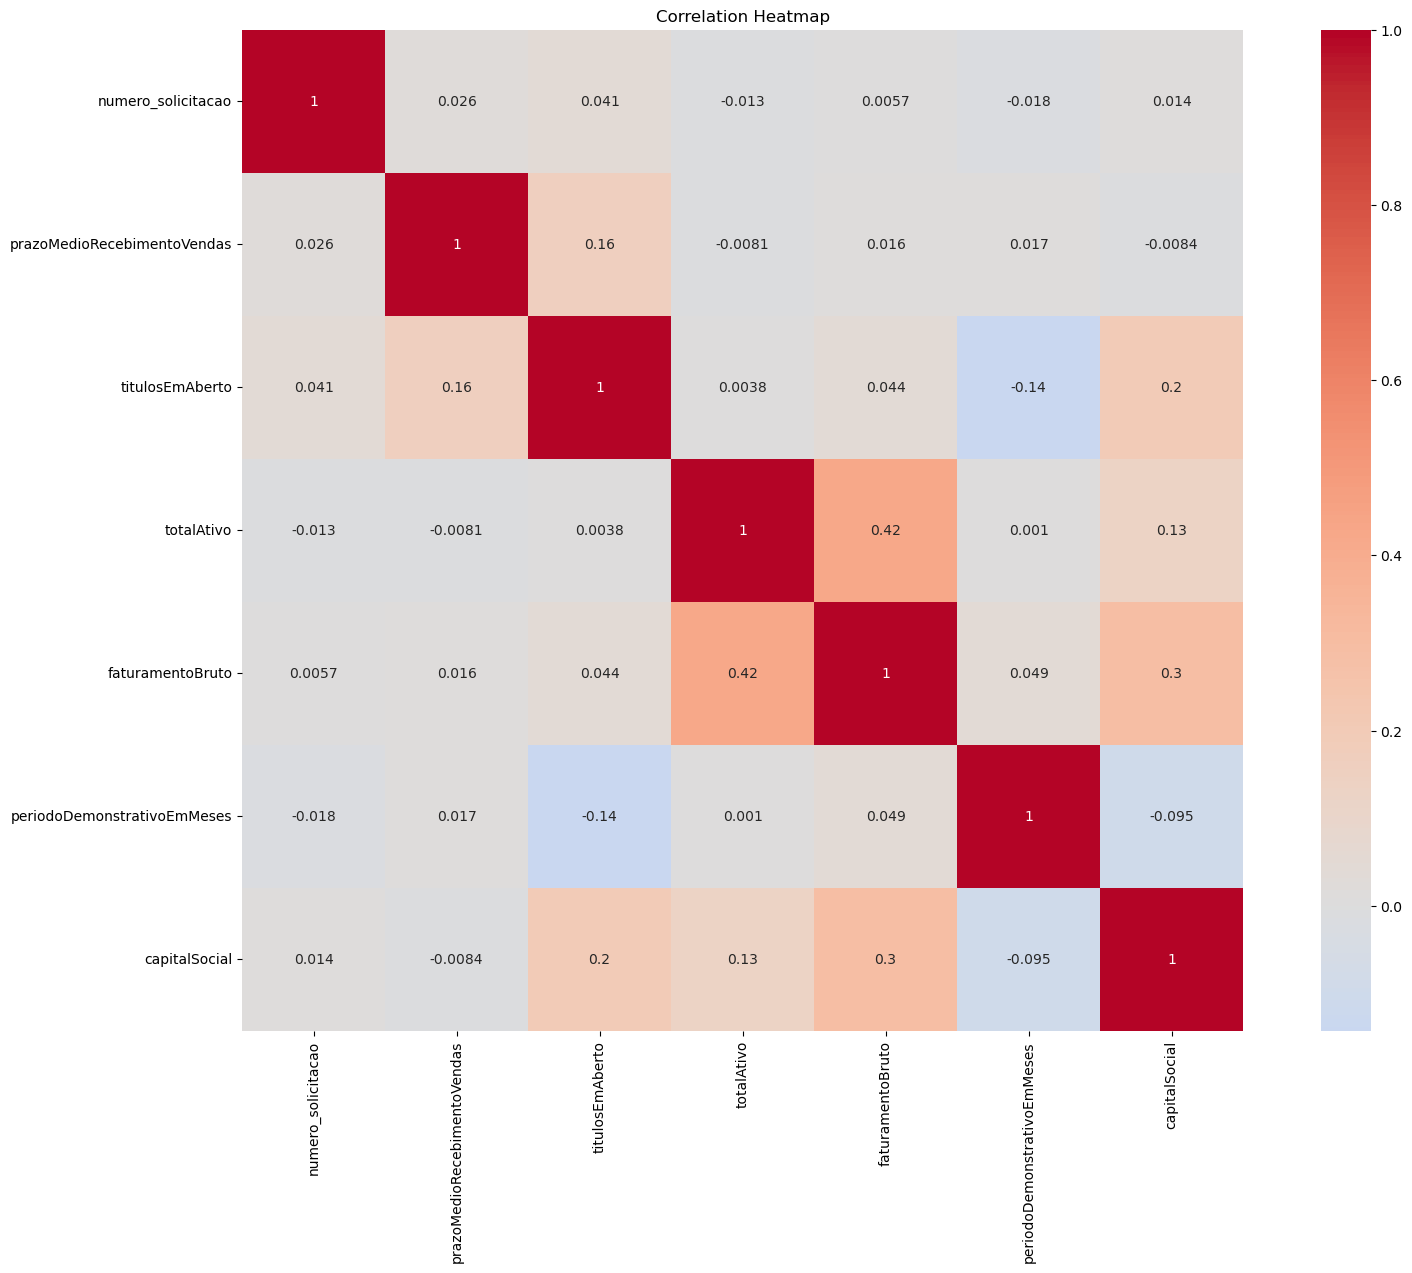

In [ ]:
corr_matrix = verifica_correlacao(df)

__Colunas finais:__

In [ ]:
for col in sorted(df.columns):
    print (col+' --  ' + dict_desc_colunas[col])

capitalSocial --  Capital social informado na documentação da empresa
cnpjSemTraco --  CNPJ Anonimizado
empresa_MeEppMei --  Flag informando se o cliente é um pequeno negócio
faturamentoBruto --  Faturamento bruto informado na documentação da empresa
intervaloFundacao --  Categoria do ano de fundação
numero_solicitacao --  Número da solicitação
periodoBalanco --  Período do balanço informado na documentação da empresa
periodoDemonstrativoEmMeses --  Período do demonstrativo informado na documentação da empresa
prazoMedioRecebimentoVendas --  prazo médio do recebimento de vendas do cliente
primeiraCompra --  Data da primeira compra na Wtec
titulosEmAberto --  valor total de títulos em aberto
totalAtivo --  Ativo informado na documentação da empresa
valorAprovado --  Valor que foi aprovado pelos analistas
valorSolicitado --  valor de crédito solicitado


# Tratando de dados faltantes
Verificando a possibilidade de aproveitar dados não-nulos de uma empresa (de uma solicitação de crédito) em linhas que tenham estes mesmo dados preenchidos em outra solicitação

In [ ]:
#nulos
df.isna().sum()/df.shape[0]

numero_solicitacao             0.000000
cnpjSemTraco                   0.000000
primeiraCompra                 0.011813
prazoMedioRecebimentoVendas    0.000000
titulosEmAberto                0.000000
valorSolicitado                0.000000
periodoBalanco                 0.472529
totalAtivo                     0.472529
faturamentoBruto               0.083584
periodoDemonstrativoEmMeses    0.083584
intervaloFundacao              0.083027
capitalSocial                  0.083027
empresa_MeEppMei               0.083027
valorAprovado                  0.156469
dtype: float64

__Vamos tratar a variável resposta e eliminar os NaN's__

Realizando a exclusão de valores não aprovados = NaN em 'valorAprovado'

In [ ]:
df.dropna(subset='valorAprovado', inplace=True)

__Abaixo é verificado se alguns dos dados nulos estão sob o mesmo CNPJ em outras linhas__

In [ ]:
empresas = df['cnpjSemTraco'].unique()
print (str(len(empresas))+' empresas no dataset')
indice_sem_balanco = df.loc[(df['totalAtivo'].isnull())].index
contagem_por_empresa = df['cnpjSemTraco'].value_counts()
nulos_por_empresa_campo = df[['cnpjSemTraco','totalAtivo']]
nulos_por_empresa_campo['null'] = ~nulos_por_empresa_campo['totalAtivo']\
                                            .notnull()\
                                            .astype(bool)
nulos_por_empresa_campo = nulos_por_empresa_campo.drop(columns = ['totalAtivo'])


nulos_por_empresa = nulos_por_empresa_campo.groupby(by='cnpjSemTraco').sum()
nulos_por_empresa['contagem_por_empresa'] = contagem_por_empresa
nulos_por_empresa['pct_nulos_totalAtivo'] = nulos_por_empresa['null'] / \
                                        nulos_por_empresa['contagem_por_empresa']
nulos_por_empresa[(nulos_por_empresa['pct_nulos_totalAtivo']>0) & (nulos_por_empresa['pct_nulos_totalAtivo']<1)]\
                    .sort_values('pct_nulos_totalAtivo', ascending = False)

2633 empresas no dataset


null  contagem_por_empresa  pct_nulos_totalAtivo
cnpjSemTraco                                                        
LPFJ21465680706778     8                     9              0.888889
FOZQ39728582407424     7                     8              0.875000
BFRW45357875791361     5                     6              0.833333
XYOK79084874197647     4                     5              0.800000
ESTG52141925374013     4                     5              0.800000
...                  ...                   ...                   ...
XPVZ80447104399027     1                    10              0.100000
NTPP27145676483888     1                    11              0.090909
MIGR17953197952198     1                    11              0.090909
IJXE11538394396738     1                    12              0.083333
LECE32338153311549     1                    13              0.076923

[468 rows x 3 columns]

__Como existem empresas com colunas que estão nulas em apenas algumas linhas, vamos agora reordenar dataframe por empresa e número de solicitação e tratando NaN e utilizar o 'backfill'__

In [ ]:
# Reordenando dataframe
df = df.sort_values(['cnpjSemTraco', 'numero_solicitacao'])\
                    .reset_index(drop=True).drop(columns = 'numero_solicitacao')
# Quebrando dataframe em dicionarios
dict_empresas = {}
for empresa in empresas:
    dict_empresas.update({empresa:df[df['cnpjSemTraco']==empresa]})
# Realizando o fillna por empresa usando ffill
for empresa in dict_empresas:
    dict_empresas[empresa] = dict_empresas[empresa].fillna(method='ffill')
# Reconstruindo dataframe
lista_df = []
for empresa in dict_empresas:
    dict_empresas[empresa] = dict_empresas[empresa].fillna(method='ffill')
    lista_df.append(dict_empresas[empresa])
df2 = pd.concat(lista_df)
df2

cnpjSemTraco       primeiraCompra  prazoMedioRecebimentoVendas  \
3144  KEBE17609492220843  2015-12-10T00:00:00                            0   
3145  KEBE17609492220843  2015-12-10T00:00:00                            0   
3146  KEBE17609492220843  2015-12-10T00:00:00                            0   
3147  KEBE17609492220843  2015-12-10T00:00:00                            0   
1834  GCVQ28531614261293  2019-11-27T00:00:00                            0   
...                  ...                  ...                          ...   
1078  DMNU57577101368941  2007-03-01T00:00:00                            0   
3951  NCCP32868223153118  2020-08-24T00:00:00                           27   
3133  KBOS63147302240824  2017-02-13T16:41:03                            0   
2781  ISPY81393760117061  2019-05-16T00:00:00                            0   
2747  IPFS70635894073808  2020-07-31T00:00:00                            0   

      titulosEmAberto  valorSolicitado       periodoBalanco  totalAtivo  \
3144              0.0          50000.0                  NaN         NaN   
3145              0.0         100000.0  2019-12-31T03:00:00   1876039.0   
3146              0.0         120000.0  2019-12-31T03:00:00   1876039.0   
3147              0.0         100000.0  2019-12-31T03:00:00   1876039.0   
1834              0.0          20000.0                  NaN         NaN   
...               ...              ...                  ...         ...   
1078              0.0          35000.0                  NaN         NaN   
3951           9334.0          50000.0  2020-12-31T03:00:00    245257.0   
3133              0.0          50000.0                  NaN         NaN   
2781              0.0         200000.0  2019-12-31T03:00:00   2336218.0   
2747              0.0          20000.0  2019-12-31T00:00:00         0.0   

      faturamentoBruto  periodoDemonstrativoEmMeses intervaloFundacao  \
3144         1766880.0                         12.0  Acima de 17 anos   
3145         1818311.0                         12.0  Acima de 17 anos   
3146         1818311.0                         12.0  Acima de 17 anos   
3147         1818311.0                         12.0  Acima de 17 anos   
1834         2814940.0                          7.0    De 6 a 10 anos   
...                ...                          ...               ...   
1078         1684508.0                         12.0  Acima de 17 anos   
3951          384958.0                         12.0     De 0 a 5 anos   
3133         3410070.0                         12.0    De 6 a 10 anos   
2781         1366363.0                         12.0     De 0 a 5 anos   
2747         5392166.0                         12.0     De 0 a 5 anos   

      capitalSocial  empresa_MeEppMei  valorAprovado  
3144        90000.0              True        50000.0  
3145        90000.0              True        65000.0  
3146        90000.0              True        65000.0  
3147        90000.0              True        65000.0  
1834        20000.0              True        20000.0  
...             ...               ...            ...  
1078        10000.0             False        30000.0  
3951        30000.0             False         5000.0  
3133       200000.0             False        45000.0  
2781       100000.0              True        15000.0  
2747       110000.0              True        20000.0  

[7569 rows x 13 columns]

__Observação de resultados:__

In [ ]:
df2_nulos = (df2.isna().sum()/df.shape[0]).sort_values(ascending = False)
df2_nulos = pd.concat([df.isna().sum()/df.shape[0],df2_nulos], axis=1)
df2_nulos.columns = ['df1', 'df2']
print ('Redução de nulos em', str(round((1-(df2_nulos['df2'].sum()/df2_nulos['df1'].sum()))*100,2))+'%.')
df2_nulos


Redução de nulos em 6.36%.


df1       df2
cnpjSemTraco                 0.000000  0.000000
primeiraCompra               0.006210  0.006210
prazoMedioRecebimentoVendas  0.000000  0.000000
titulosEmAberto              0.000000  0.000000
valorSolicitado              0.000000  0.000000
periodoBalanco               0.420267  0.393843
totalAtivo                   0.420267  0.393843
faturamentoBruto             0.000528  0.000000
periodoDemonstrativoEmMeses  0.000528  0.000000
intervaloFundacao            0.000000  0.000000
capitalSocial                0.000000  0.000000
empresa_MeEppMei             0.000000  0.000000
valorAprovado                0.000000  0.000000

__Na comparação entre a df1 (antes do tratamento) e a df2 (após o tratamento), a quantidade de nulos foi reduzida em 6.09%.__

# Feature Engineering

## Transformação de datas
As datas estão no formato data-hora-minuto-segundo e serão transformadas em colunas apartadas

In [ ]:
def split_datas(df, cols):
    df = df.copy()
    for col in cols:
        for ymd in ['Y', 'm']:
            df[col+'_'+ymd] = df.loc[df[col].notnull(), col] \
                .apply(lambda x: int(datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S') \
                .strftime('%'+ymd)))
    df.drop(columns=cols, inplace=True)
    return df
df2 = split_datas(df2, ['primeiraCompra', 'periodoBalanco'])

## Solicitações de crédito

O código abaixo insere uma coluna com quantidades de solicitações de crédito por CNPJ

In [ ]:
df2["qtd_solic"] = df.groupby('cnpjSemTraco')['cnpjSemTraco'].rank(method="first", ascending=True)
df2[['cnpjSemTraco', 'qtd_solic']].head(10)

cnpjSemTraco  qtd_solic
3144  KEBE17609492220843        1.0
3145  KEBE17609492220843        2.0
3146  KEBE17609492220843        3.0
3147  KEBE17609492220843        4.0
1834  GCVQ28531614261293        1.0
1835  GCVQ28531614261293        2.0
1836  GCVQ28531614261293        3.0
1837  GCVQ28531614261293        4.0
1838  GCVQ28531614261293        5.0
1839  GCVQ28531614261293        6.0

# Pré-processamento

##Label Encoding

Antes da clusterização, é preciso aumentar o grão em um nível, de forma que cada linha expresse uma empresa. Isso facilitará na análise de clusters e permitirá que tratemos os NaN's ainda presentes com informações dos clusters.

Para isso, será aplicado o 'Label Encoding' nas variáveis do tipo 'Object' para então agrupar em empresas usando a média das variáveis e rodar a clusterização.

In [ ]:
def label_encode_write_json(df,ignore_cols = None, name = None):
    cols = list(df.columns)
    if ignore_cols != None:
        if type(ignore_cols) != list:
            ignore_cols = [ignore_cols]
        cols = set(cols)-set(ignore_cols)
    le = LabelEncoder()
    dict_label_encoder = {}
    for col in cols:
        if df[col].dtype == 'object':
            le.fit(df[col])
            df[col] = le.transform(df[col])
            for val in df[col].drop_duplicates():
                try:
                    dict_label_encoder[col].update({le.inverse_transform([val])[0]:val})
                except:
                    dict_label_encoder.update({col:{le.inverse_transform([val])[0]:val}})
    if name != None:
        try:
            os.mkdir('Models')
        except:
            pass
        with open ('Models/label_encoder_{name}.json'.format(name=name), 'w') as jsonfile:
            json.dump(dict_label_encoder, jsonfile)         
    return df

__Abaixo um novo dataframe df_empresas foi criado, em seguida as variáveis pouco pertinentes à 'persona' dos perfis de crédito foram removidas baseado no tratamento de correlação e aplicação da função para 'Label Encoding':__

In [ ]:
df_empresas = df2.copy()

df_empresas = df_empresas.drop(columns = ['valorAprovado',
                                          'primeiraCompra_Y',
                                          'primeiraCompra_m',
                                          'periodoBalanco_Y',
                                          'periodoBalanco_m',
                                          'valorSolicitado'])

df_empresas = label_encode_write_json(df_empresas, ignore_cols = 'cnpjSemTraco', name = '{cnt}col'\
                                                                  .format(cnt = df_empresas.shape[1]))
df_empresas

cnpjSemTraco  prazoMedioRecebimentoVendas  titulosEmAberto  \
3144  KEBE17609492220843                            0              0.0   
3145  KEBE17609492220843                            0              0.0   
3146  KEBE17609492220843                            0              0.0   
3147  KEBE17609492220843                            0              0.0   
1834  GCVQ28531614261293                            0              0.0   
...                  ...                          ...              ...   
1078  DMNU57577101368941                            0              0.0   
3951  NCCP32868223153118                           27           9334.0   
3133  KBOS63147302240824                            0              0.0   
2781  ISPY81393760117061                            0              0.0   
2747  IPFS70635894073808                            0              0.0   

      totalAtivo  faturamentoBruto  periodoDemonstrativoEmMeses  \
3144         NaN         1766880.0                         12.0   
3145   1876039.0         1818311.0                         12.0   
3146   1876039.0         1818311.0                         12.0   
3147   1876039.0         1818311.0                         12.0   
1834         NaN         2814940.0                          7.0   
...          ...               ...                          ...   
1078         NaN         1684508.0                         12.0   
3951    245257.0          384958.0                         12.0   
3133         NaN         3410070.0                         12.0   
2781   2336218.0         1366363.0                         12.0   
2747         0.0         5392166.0                         12.0   

      intervaloFundacao  capitalSocial  empresa_MeEppMei  qtd_solic  
3144                  0        90000.0              True        1.0  
3145                  0        90000.0              True        2.0  
3146                  0        90000.0              True        3.0  
3147                  0        90000.0              True        4.0  
1834                  3        20000.0              True        1.0  
...                 ...            ...               ...        ...  
1078                  0        10000.0             False        1.0  
3951                  1        30000.0             False        1.0  
3133                  3       200000.0             False        1.0  
2781                  1       100000.0              True        1.0  
2747                  1       110000.0              True        1.0  

[7569 rows x 10 columns]

__Agrupamento de empresas:__

In [ ]:
df_empresas = df_empresas.groupby('cnpjSemTraco').agg({
    'prazoMedioRecebimentoVendas':'mean',
    'titulosEmAberto':'mean',
    'totalAtivo':'max',
    'faturamentoBruto':'max',
    'periodoDemonstrativoEmMeses':'mean',
    'intervaloFundacao':'max',
    'capitalSocial':'mean',
    'empresa_MeEppMei':'max',
    'qtd_solic':'max'
})

##Tratando nulos restantes

In [ ]:
df_empresas.isna().sum()

prazoMedioRecebimentoVendas       0
titulosEmAberto                   0
totalAtivo                     1181
faturamentoBruto                  0
periodoDemonstrativoEmMeses       0
intervaloFundacao                 0
capitalSocial                     0
empresa_MeEppMei                  0
qtd_solic                         0
dtype: int64

__Demonstração volumétria antes e depois de aplicar dropna():__

In [ ]:
print (df_empresas.shape[0],'linhas atuais\n',df_empresas.dropna().shape[0],'linhas se dropna()')

2633 linhas atuais
 1452 linhas se dropna()


No entanto, ao aplicar dropna()', muitas linhas seriam eliminadas. Como as variáveis com NaN no dataset são de empresas são das variáveis 'Ativo' e 'Capital Social', uma análise será aplicada para verificar o que ocorre com os valores cedidos para empresas sem estas informações:_

In [ ]:
#Total de crédito concedido para empresas com capitalSocial nulo
print ('dropna() em capitalSocial nos tira $'+ \
       str(df[df['capitalSocial'].isna()]['valorAprovado'].astype(float).sum()) + \
       ' da variavel-resposta.')

#Total de crédito concedido para empresas com totalAtivo nulo
print ('dropna() em totalAtivo nos tira $'+ \
       str(df[df['totalAtivo'].isna()]['valorAprovado'].astype(float).sum()) + \
       ' da variavel-resposta.')

dropna() em capitalSocial nos tira $0.0 da variavel-resposta.
dropna() em totalAtivo nos tira $253344534.0 da variavel-resposta.


Portanto, é possível concluir ser **necessário** manter informações de 'totalAtivo', porém não de 'capitalSocial'.
Por conta disso, as linhas NaN da variável 'capitalSocial' serão removidas e as linhas NaN de 'totalAtivo' transformadas em 0.

In [ ]:
df_empresas.dropna(subset=['capitalSocial'], inplace = True)
df_empresas['totalAtivo'].fillna(0, inplace=True)

In [ ]:
for col in df_empresas.columns:
    df_empresas[col].fillna(df_empresas[col].mean(), inplace=True)
df_empresas.isna().sum()

prazoMedioRecebimentoVendas    0
titulosEmAberto                0
totalAtivo                     0
faturamentoBruto               0
periodoDemonstrativoEmMeses    0
intervaloFundacao              0
capitalSocial                  0
empresa_MeEppMei               0
qtd_solic                      0
dtype: int64

__Cópia do Dataframe 'df_empresas' e exclusão da indice coluna de CNPJ:__

In [ ]:
df_empresas_com_cnpj = df_empresas.copy() 
df_empresas = df_empresas.reset_index(drop=True)

# Clusterização

##Aplicando algoritmos de Clustering
Nesse projeto, serão aplicados os algoritmos: 
- DBSCAN 
- KMeans 
- GaussianMixture

###DBSCAN

In [ ]:
dbscan = DBSCAN(eps=3, min_samples=3)
dbscan.fit(df_empresas)
df_empresas_dbscan = df_empresas.copy()
df_empresas_dbscan['label'] = dbscan.labels_
print (len(df_empresas_dbscan['label'].unique()), 'clusters')
df_empresas_dbscan['label'].value_counts()/df_empresas_dbscan.shape[0]*100

10 clusters


-1    98.670718
 2     0.227877
 6     0.189897
 7     0.189897
 0     0.151918
 1     0.113938
 3     0.113938
 4     0.113938
 5     0.113938
 8     0.113938
Name: label, dtype: float64

**Resultado:** DBSCAN gerou representatividade muito baixa em clusters que não o -1.

###K-Means

In [ ]:
kmeans = KMeans(n_clusters=3, 
                max_iter=1000,
                tol=1e-4)

y_kmeans = kmeans.fit_predict(df_empresas)
df_empresas_kmeans = df_empresas.copy()
df_empresas_kmeans['label'] = y_kmeans
print (len(df_empresas_kmeans['label'].unique()), 'clusters')
df_empresas_kmeans['label'].value_counts()/df_empresas_kmeans.shape[0]*100

3 clusters


0    99.430308
2     0.531713
1     0.037979
Name: label, dtype: float64

**Resultado:** mesmo retorno ocorrendo no K-Means

###Gaussian Mixture

In [ ]:
gm = GaussianMixture(n_components=3, 
                     max_iter=1000, 
                     tol=1e-4,
                     init_params='random')
gm.fit(df_empresas)
y_gm = gm.predict(df_empresas)
df_empresas_gm = df_empresas.copy()
df_empresas_gm['label'] = y_gm
print (len(df_empresas_gm['label'].unique()), 'clusters')
df_empresas_gm['label'].value_counts()/df_empresas_gm.shape[0]*100

3 clusters


2    64.641094
0    24.382833
1    10.976073
Name: label, dtype: float64

**Resultado:** Com GaussianMixture, nota-se uma distribuição melhor

## O melhor modelo de Clusterização
O modelo será salvo e então analisado os clusters com base nas features. 

In [ ]:
with open('Models/gm_clusterizer.pkl', 'wb') as picklefile:
    pickle.dump(gm, picklefile)

##Função para analisar os clusters##

In [ ]:
def cluster_analysis(df, labelcol = 'label'):
    dict_cluster_means = {}
    clusters = df[labelcol].unique()
    for cluster in clusters:
        cluster_mean = df[df[labelcol]==cluster].drop(columns = [labelcol]).agg('mean').to_dict()
        dict_cluster_means.update({cluster:cluster_mean})
    display(pd.DataFrame(dict_cluster_means).T.sort_index())
cluster_analysis(df_empresas_gm)

prazoMedioRecebimentoVendas  titulosEmAberto    totalAtivo  \
0                    51.904984     17814.750343  1.365503e+08   
1                    34.640138    203041.584429  2.051091e+08   
2                     0.000000         0.000000  2.634591e+06   

   faturamentoBruto  periodoDemonstrativoEmMeses  intervaloFundacao  \
0      3.537338e+07                    10.553006           1.308411   
1      3.811448e+08                     9.853111           1.031142   
2      7.408757e+06                    10.478992           1.340776   

   capitalSocial  empresa_MeEppMei  qtd_solic  
0   2.098825e+05          0.476636   3.813084  
1   9.609623e+07          0.152249   4.927336  
2   2.490364e+05          0.515864   2.172150

##Normalização dos Clusters (grupos)

Nessa etapa, os labels de cluster (grupos) serão designados no dataset de solicitações de crédito, baseando-se nos cluster gerados na etapa anterior. Dentro do dataset, portanto, haverá um agrupamento de clientes (por CNPJ) com label designado na coluna chamada 'label',usando o modelo de clusterização. Para isso, o GridSearchCV será usado para selecionar os melhores modelos e hiperparâmetros por cluster.

In [ ]:
df_empresas_com_cnpj.dropna(subset=['capitalSocial'], inplace = True)

In [ ]:
def adiciona_label(df, clusterizacao_escolhida): 
    df_cnpj_label = df_empresas_com_cnpj.copy()
    if clusterizacao_escolhida == 'dbscan':
        label = dbscan.labels_
    elif clusterizacao_escolhida == 'kmeans':
        label = y_kmeans
    elif clusterizacao_escolhida == 'gaussian_mixture':
        label = y_gm
    else:
        raise Exception ('escolha entre dbscan, kmeans e gaussian_mixture!')
    df_cnpj_label['label'] = label
    dict_cnpj_label = df_cnpj_label[['label']].to_dict()['label']
    #Designando label por cnpj no dataframe de solicitações de crédito
    df = df.copy()
    df['label'] = df['cnpjSemTraco'].apply(lambda x: dict_cnpj_label[x] \
                                           if x in dict_cnpj_label else np.nan)
    #Eliminando linhas não possuem variável capitalSocial, como no modelo que gerou o label
    df.dropna(subset='label', inplace=True) 
    return df
df3 = adiciona_label(df2, 'gaussian_mixture')
df3[['cnpjSemTraco', 'label']]

cnpjSemTraco  label
3144  KEBE17609492220843      2
3145  KEBE17609492220843      2
3146  KEBE17609492220843      2
3147  KEBE17609492220843      2
1834  GCVQ28531614261293      2
...                  ...    ...
1078  DMNU57577101368941      2
3951  NCCP32868223153118      0
3133  KBOS63147302240824      2
2781  ISPY81393760117061      2
2747  IPFS70635894073808      2

[7569 rows x 2 columns]

###Tratando nulos restantes

__Removendo a coluna com CNPJ e NaN do coluna 'capitalSocial':__

In [ ]:
df3 = df3.drop(columns = ['cnpjSemTraco']).reset_index(drop=True)

print(df3.shape[0] - df3.dropna(subset='capitalSocial').shape[0], 'linhas dropadas em capitalSocial')
df3.dropna(subset='capitalSocial', inplace=True)
df3

0 linhas dropadas em capitalSocial


prazoMedioRecebimentoVendas  titulosEmAberto  valorSolicitado  \
0                               0              0.0          50000.0   
1                               0              0.0         100000.0   
2                               0              0.0         120000.0   
3                               0              0.0         100000.0   
4                               0              0.0          20000.0   
...                           ...              ...              ...   
7564                            0              0.0          35000.0   
7565                           27           9334.0          50000.0   
7566                            0              0.0          50000.0   
7567                            0              0.0         200000.0   
7568                            0              0.0          20000.0   

      totalAtivo  faturamentoBruto  periodoDemonstrativoEmMeses  \
0            NaN         1766880.0                         12.0   
1      1876039.0         1818311.0                         12.0   
2      1876039.0         1818311.0                         12.0   
3      1876039.0         1818311.0                         12.0   
4            NaN         2814940.0                          7.0   
...          ...               ...                          ...   
7564         NaN         1684508.0                         12.0   
7565    245257.0          384958.0                         12.0   
7566         NaN         3410070.0                         12.0   
7567   2336218.0         1366363.0                         12.0   
7568         0.0         5392166.0                         12.0   

     intervaloFundacao  capitalSocial  empresa_MeEppMei  valorAprovado  \
0     Acima de 17 anos        90000.0              True        50000.0   
1     Acima de 17 anos        90000.0              True        65000.0   
2     Acima de 17 anos        90000.0              True        65000.0   
3     Acima de 17 anos        90000.0              True        65000.0   
4       De 6 a 10 anos        20000.0              True        20000.0   
...                ...            ...               ...            ...   
7564  Acima de 17 anos        10000.0             False        30000.0   
7565     De 0 a 5 anos        30000.0             False         5000.0   
7566    De 6 a 10 anos       200000.0             False        45000.0   
7567     De 0 a 5 anos       100000.0              True        15000.0   
7568     De 0 a 5 anos       110000.0              True        20000.0   

      primeiraCompra_Y  primeiraCompra_m  periodoBalanco_Y  periodoBalanco_m  \
0               2015.0              12.0               NaN               NaN   
1               2015.0              12.0            2019.0              12.0   
2               2015.0              12.0            2019.0              12.0   
3               2015.0              12.0            2019.0              12.0   
4               2019.0              11.0               NaN               NaN   
...                ...               ...               ...               ...   
7564            2007.0               3.0               NaN               NaN   
7565            2020.0               8.0            2020.0              12.0   
7566            2017.0               2.0               NaN               NaN   
7567            2019.0               5.0            2019.0              12.0   
7568            2020.0               7.0            2019.0              12.0   

      qtd_solic  label  
0           1.0      2  
1           2.0      2  
2           3.0      2  
3           4.0      2  
4           1.0      2  
...         ...    ...  
7564        1.0      2  
7565        1.0      0  
7566        1.0      2  
7567        1.0      2  
7568        1.0      2  

[7569 rows x 16 columns]

__Corrigindo nulos com valor 0:__

In [ ]:
df3.fillna(0, inplace=True)

###Label Encoding
Aplicando LabelEncoder em todo o dataframe

In [ ]:
df_le = label_encode_write_json(df3, name = '{cnt}col'.format(cnt = df3.shape[1]))
display(df_le)

prazoMedioRecebimentoVendas  titulosEmAberto  valorSolicitado  \
0                               0              0.0          50000.0   
1                               0              0.0         100000.0   
2                               0              0.0         120000.0   
3                               0              0.0         100000.0   
4                               0              0.0          20000.0   
...                           ...              ...              ...   
7564                            0              0.0          35000.0   
7565                           27           9334.0          50000.0   
7566                            0              0.0          50000.0   
7567                            0              0.0         200000.0   
7568                            0              0.0          20000.0   

      totalAtivo  faturamentoBruto  periodoDemonstrativoEmMeses  \
0            0.0         1766880.0                         12.0   
1      1876039.0         1818311.0                         12.0   
2      1876039.0         1818311.0                         12.0   
3      1876039.0         1818311.0                         12.0   
4            0.0         2814940.0                          7.0   
...          ...               ...                          ...   
7564         0.0         1684508.0                         12.0   
7565    245257.0          384958.0                         12.0   
7566         0.0         3410070.0                         12.0   
7567   2336218.0         1366363.0                         12.0   
7568         0.0         5392166.0                         12.0   

      intervaloFundacao  capitalSocial  empresa_MeEppMei  valorAprovado  \
0                     0        90000.0              True        50000.0   
1                     0        90000.0              True        65000.0   
2                     0        90000.0              True        65000.0   
3                     0        90000.0              True        65000.0   
4                     3        20000.0              True        20000.0   
...                 ...            ...               ...            ...   
7564                  0        10000.0             False        30000.0   
7565                  1        30000.0             False         5000.0   
7566                  3       200000.0             False        45000.0   
7567                  1       100000.0              True        15000.0   
7568                  1       110000.0              True        20000.0   

      primeiraCompra_Y  primeiraCompra_m  periodoBalanco_Y  periodoBalanco_m  \
0               2015.0              12.0               0.0               0.0   
1               2015.0              12.0            2019.0              12.0   
2               2015.0              12.0            2019.0              12.0   
3               2015.0              12.0            2019.0              12.0   
4               2019.0              11.0               0.0               0.0   
...                ...               ...               ...               ...   
7564            2007.0               3.0               0.0               0.0   
7565            2020.0               8.0            2020.0              12.0   
7566            2017.0               2.0               0.0               0.0   
7567            2019.0               5.0            2019.0              12.0   
7568            2020.0               7.0            2019.0              12.0   

      qtd_solic  label  
0           1.0      2  
1           2.0      2  
2           3.0      2  
3           4.0      2  
4           1.0      2  
...         ...    ...  
7564        1.0      2  
7565        1.0      0  
7566        1.0      2  
7567        1.0      2  
7568        1.0      2  

[7569 rows x 16 columns]

###Dicionário de Clusters

Nessa etapa, modelos diferentes serão aplicados para cada label designado e o dataframe dividido por grupos, inserindo-os em um dicionário. Em seguida, a coluna label será removida por já estar na chave do dicionário.

Esta etapa só é necessária para treinar os modelos, aplicando-se o modelo para novos clientes e assim classificando em seu determidando grupo (cluster).

In [ ]:
dict_clusters = {}
for label in df_le['label'].unique():
    dict_clusters.update({str(label):df_le[df_le['label']==label].drop(columns='label')}) 

dict_clusters.keys()

dict_keys(['2', '0', '1'])

### Standard Scale

Aplicando standard scale para todos os clusters (grupos) e transformando o dataframe com standard scaler escrevendo pickle

In [ ]:
def standard_scale_write_picke(df, write_pickle = False, filename = None):
    sc = StandardScaler()
    sc.fit(df)
    
    if filename != None:
        with open ('Models/standard_scaler_{filename}.pkl'.format(filename=filename)
                   ,'wb') as picklefile:
            pickle.dump(sc, picklefile)
    
    X_z = pd.DataFrame(sc.transform(df))
    X_z.columns = df.columns
    
    return X_z

for cluster in dict_clusters:
    X_z = standard_scale_write_picke(dict_clusters[cluster],
                            filename = str(len(dict_clusters[cluster].columns))+'cols_cluster'+cluster)
    dict_clusters[cluster] = X_z

###Removendo outliers 
Critério de 3 desvios padrão

In [ ]:
print ("remoção de zscore acima de 3 desvios padrão:")
for cluster in sorted(dict_clusters):
    cluster_df = dict_clusters[cluster]
    print ('\tcluster {} reduzindo de'.format(cluster), cluster_df.shape[0], 'para', end=' ')
    cluster_df = cluster_df[(np.abs(stats.zscore(cluster_df)).fillna(0) < 3 ).all(axis=1)]
    dict_clusters.update({cluster:cluster_df})
    print (cluster_df.shape[0], 'linhas.')

remoção de zscore acima de 3 desvios padrão:
	cluster 0 reduzindo de 2448 para 2157 linhas.
	cluster 1 reduzindo de 1424 para 1239 linhas.
	cluster 2 reduzindo de 3697 para 3137 linhas.


#Modelos de Predição
Modelos a testar:
* LinearRegression
* RandomForest
* SVR
* MLPRegressor

##Definindo modelos e parâmetros

In [ ]:
modelos = {
    'linearRegression':LinearRegression(),
    'RandomForest':RandomForestRegressor(),
    'SVR':SVR(),
    'MLPRegressor':MLPRegressor()}
params = {
            'linearRegression':
                    {},
            'RandomForest':
                    {'n_estimators':(50, 75, 100, 125, 150, 175, 200),
                     'min_samples_split':(1, 2, 3, 4),
                     'min_samples_leaf':(1,2,3)},
            'SVR':
                    {'kernel':('rbf','linear','sigmoid')},
            'MLPRegressor':
                    {'hidden_layer_sizes':(50, 100, 150),
                    'activation':( 'tanh', 'relu'),
                    'learning_rate':('constant', 'adaptive')}
        }

##Aplicando os modelos

In [ ]:
df_results = {}
for cluster in sorted(dict_clusters): # para cada cluster
    print ('cluster', cluster)
    for modelo in modelos: # para cada modelo
        print ('\tmodelo',modelo)
        parametros = params[modelo]
        modelo_inst = modelos[modelo]
        grid = GridSearchCV(modelo_inst, parametros, scoring = 'r2', cv=5)
        
        df = dict_clusters[cluster]
        X = df.drop(columns = ['valorAprovado'])
        y = df['valorAprovado']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
        
        grid.fit(X_train, y_train)
        
        #Fazendo teste na base de teste
        y_pred = grid.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        
        #Tratando resultados
        df_result = pd.DataFrame(grid.cv_results_)
        df_result = df_result[df_result['rank_test_score']==1]
        df_result['model'] = modelo
        df_result['cluster'] = cluster
        df_result = df_result[['model', 'cluster', 'params', 'mean_test_score']]
        df_result.columns = ['model', 'cluster', 'params', 'r2_score_grid']
        df_result['rmse'] = rmse
        
        try:
            df_results[modelo].append(df_result)
        except:
            df_results.update({modelo:[df_result]})
        

cluster 0
	modelo linearRegression
	modelo RandomForest
	modelo SVR
	modelo MLPRegressor
cluster 1
	modelo linearRegression
	modelo RandomForest
	modelo SVR
	modelo MLPRegressor
cluster 2
	modelo linearRegression
	modelo RandomForest
	modelo SVR
	modelo MLPRegressor


__Agregando dataframe por modelo:__

In [ ]:
for model in df_results:
    df_results[model] = pd.concat(df_results[model])

##Análise de performance

In [ ]:
modellst = []
for model in df_results:
    modellst.append(df_results[model])
df_results_all = pd.concat(modellst)
print ('todos os testes:')
display(df_results_all.sort_values(['model', 'cluster'], ascending=True))

df_results_all['rank'] = df_results_all.groupby('cluster')[['r2_score_grid']] \
                                    .rank(method="first", ascending=False)
df_results_all = df_results_all[df_results_all['rank']==1.0]

print ('melhores modelos:')
df_results_all.drop(columns=['rank']).sort_values(['cluster']).reset_index(drop=True)

todos os testes:


model cluster  \
10      MLPRegressor       0   
5       MLPRegressor       1   
11      MLPRegressor       2   
45      RandomForest       0   
47      RandomForest       1   
17      RandomForest       2   
0                SVR       0   
1                SVR       1   
1                SVR       2   
0   linearRegression       0   
0   linearRegression       1   
0   linearRegression       2   

                                               params  r2_score_grid      rmse  
10  {'activation': 'relu', 'hidden_layer_sizes': 1...       0.859563  0.154147  
5   {'activation': 'tanh', 'hidden_layer_sizes': 1...       0.872771  0.170286  
11  {'activation': 'relu', 'hidden_layer_sizes': 1...       0.739463  0.138571  
45  {'min_samples_leaf': 2, 'min_samples_split': 3...       0.911949  0.128804  
47  {'min_samples_leaf': 2, 'min_samples_split': 3...       0.939003  0.127306  
17  {'min_samples_leaf': 1, 'min_samples_split': 3...       0.868928  0.095878  
0                                   {'kernel': 'rbf'}       0.815462  0.179478  
1                                {'kernel': 'linear'}       0.597052  0.263322  
1                                {'kernel': 'linear'}       0.657994  0.157093  
0                                                  {}       0.828534  0.168407  
0                                                  {}       0.875037  0.156387  
0                                                  {}       0.653474  0.170763

melhores modelos:


model cluster                                             params  \
0  RandomForest       0  {'min_samples_leaf': 2, 'min_samples_split': 3...   
1  RandomForest       1  {'min_samples_leaf': 2, 'min_samples_split': 3...   
2  RandomForest       2  {'min_samples_leaf': 1, 'min_samples_split': 3...   

   r2_score_grid      rmse  
0       0.911949  0.128804  
1       0.939003  0.127306  
2       0.868928  0.095878

**Resultado:** Nota-se acima que os melhores modelos foram RandomForest, porém os hiperparâmetros mudaram por cluster.

##O melhor modelo de Predição

Abaixo o melhor modelo é confirmado usando usando a base de teste e o modelo é em seguida salvo.

###Dicionário de parâmetros por cluster

In [ ]:
dict_params_per_cluster = {}
params_per_cluster = df_results_all[['cluster', 'params']]
for cluster in sorted(dict_clusters):
    dict_params = params_per_cluster[params_per_cluster['cluster']==cluster]['params'].to_dict()
    dict_params_per_cluster.update({cluster:list(dict_params.values())[0]}) 
dict_params_per_cluster

{'0': {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 125},
 '1': {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 175},
 '2': {'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 125}}

###Salvar o Modelo

In [ ]:
for cluster in sorted(dict_clusters):
    df = dict_clusters[cluster]
    X = df.drop(columns = ['valorAprovado'])
    y = df['valorAprovado']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
    rf = RandomForestRegressor(**dict_params_per_cluster[cluster])
    rf.fit(X_train, y_train)
    with open ('Models/rf_cluster{}.pkl'.format(cluster), 'wb') as picklefile:
        pickle.dump(rf, picklefile)
        print ('pickle Models/rf_cluster{}.pkl salvo com sucesso'.format(cluster))

pickle Models/rf_cluster0.pkl salvo com sucesso
pickle Models/rf_cluster1.pkl salvo com sucesso
pickle Models/rf_cluster2.pkl salvo com sucesso


###### __FIM__